In [1]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [2]:
!pip install scikit-learn

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('yield_df.csv')
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.shape

(28242, 7)

In [6]:
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [8]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [9]:
df.duplicated().sum()

2310

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
def isStr(obj):
    try:
        float(obj)
        return False
    except:
        return True
to_drop = df[df['average_rain_fall_mm_per_year'].apply(isStr)].index

In [13]:
df = df.drop(to_drop)

In [14]:
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [15]:
df['average_rain_fall_mm_per_year'] = df['average_rain_fall_mm_per_year'].astype(np.float64)

In [16]:
len(df['Area'].unique())

101

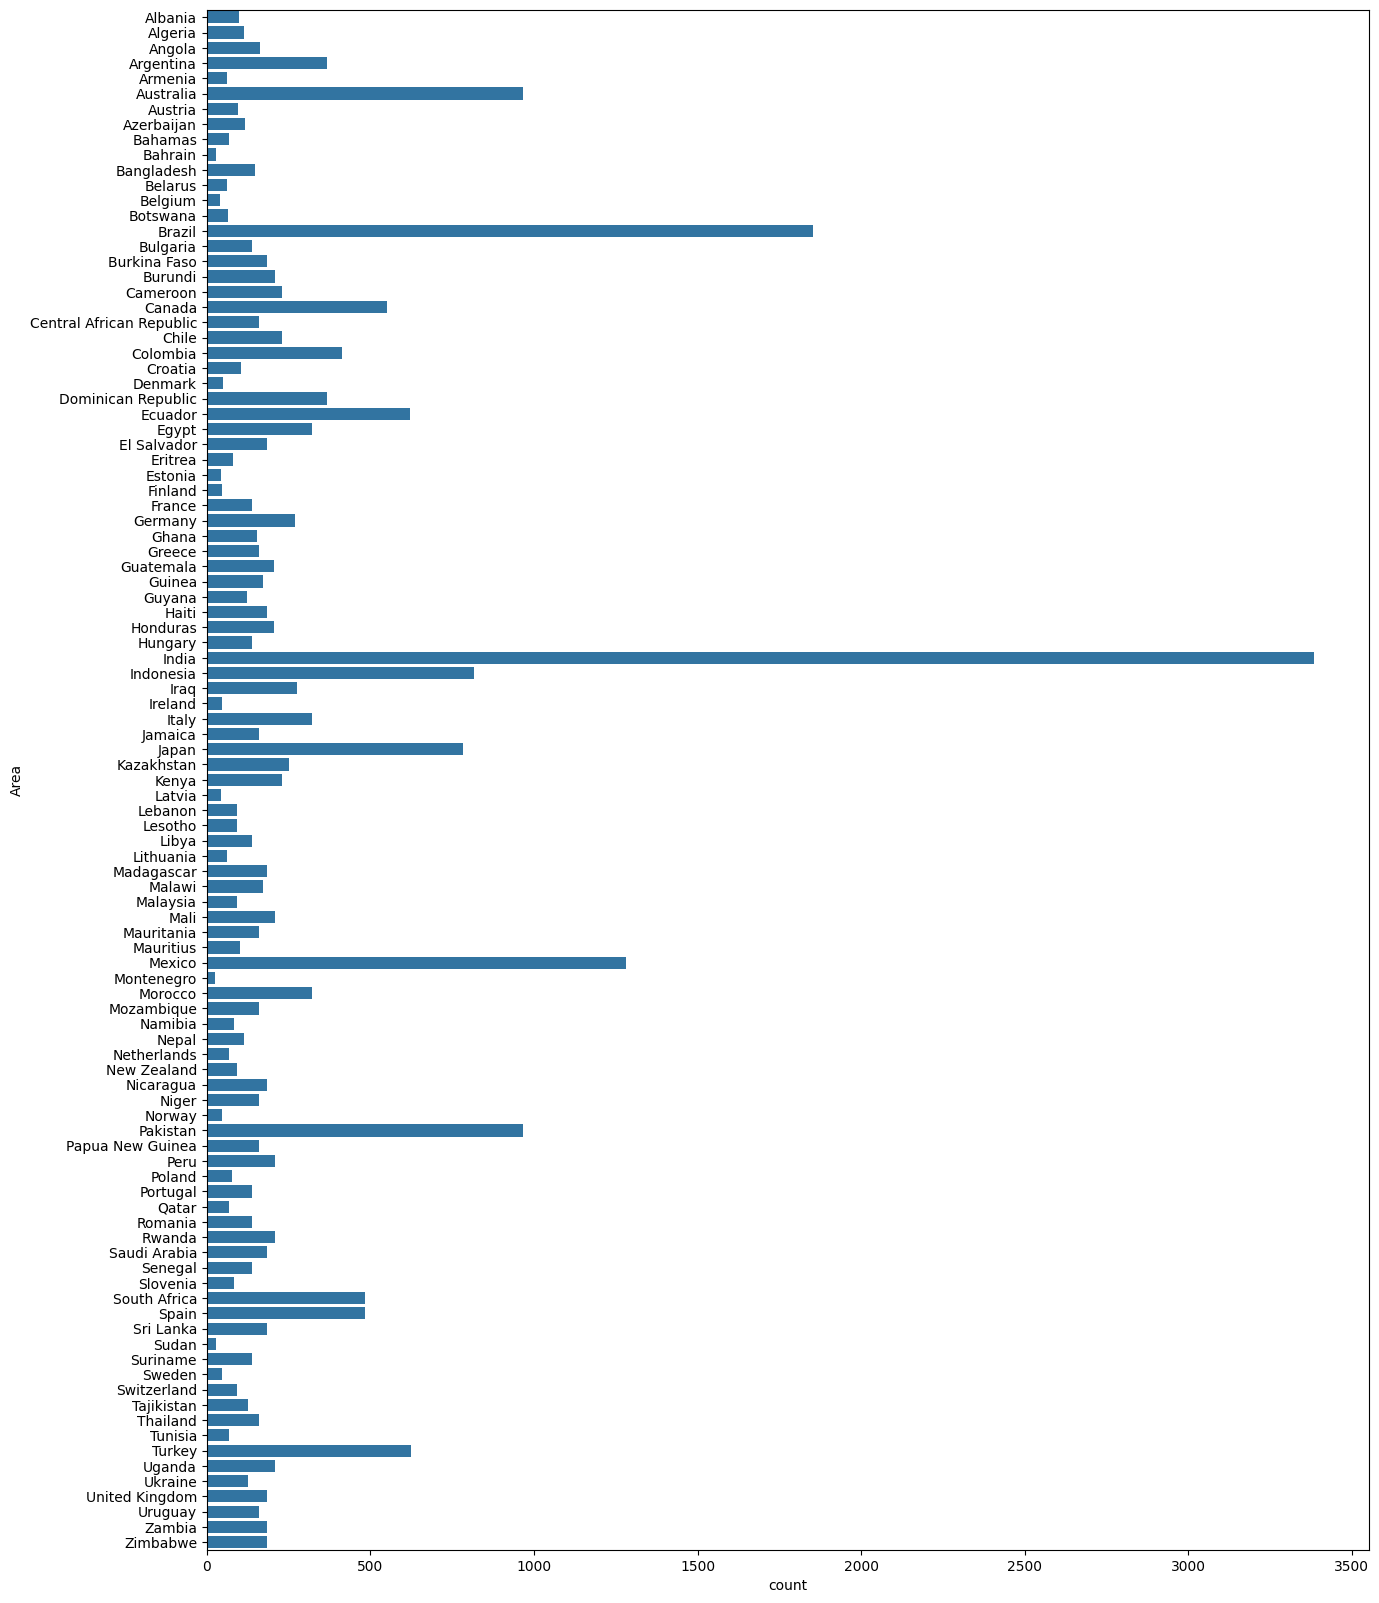

In [17]:
plt.figure(figsize=(15,20))
sns.countplot(y=df['Area'])
plt.show()

In [18]:
col = ['Year', 'average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp', 'Area', 'Item', 'hg/ha_yield']
df = df[col]


In [19]:
df

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485.0,121.00,16.37,Albania,Maize,36613
1,1990,1485.0,121.00,16.37,Albania,Potatoes,66667
2,1990,1485.0,121.00,16.37,Albania,"Rice, paddy",23333
3,1990,1485.0,121.00,16.37,Albania,Sorghum,12500
4,1990,1485.0,121.00,16.37,Albania,Soybeans,7000
...,...,...,...,...,...,...,...
28237,2013,657.0,2550.07,19.76,Zimbabwe,"Rice, paddy",22581
28238,2013,657.0,2550.07,19.76,Zimbabwe,Sorghum,3066
28239,2013,657.0,2550.07,19.76,Zimbabwe,Soybeans,13142
28240,2013,657.0,2550.07,19.76,Zimbabwe,Sweet potatoes,22222


In [20]:
X = df.drop('hg/ha_yield', axis=1)
y= df['hg/ha_yield']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [23]:
X_train.shape

(20745, 6)

In [24]:
X_test.shape

(5187, 6)

In [25]:
X_train

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item
24234,2000,59.0,3024.11,26.55,Saudi Arabia,Sorghum
9468,2012,652.0,8002.20,18.82,Greece,Sweet potatoes
6793,2006,3240.0,98328.63,27.51,Colombia,Maize
28212,2010,657.0,3305.17,21.17,Zimbabwe,Potatoes
7358,2007,1410.0,5689.80,27.08,Dominican Republic,Sweet potatoes
...,...,...,...,...,...,...
23678,2004,854.0,16942.00,16.31,Portugal,Sweet potatoes
5960,2006,537.0,36572.75,7.85,Canada,Wheat
860,1991,534.0,17866.00,18.73,Australia,Potatoes
17223,1998,250.0,6416.14,6.94,Kazakhstan,Potatoes


In [26]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


In [27]:
ohe = OneHotEncoder(drop='first')
scaler = StandardScaler()

In [28]:
preprocessor = ColumnTransformer(
    transformers=[
        ('onehotencoder',ohe,[4,5]),
        ('std',scaler,[0,1,2,3])
    ]
)

In [30]:
preprocessor

ColumnTransformer(transformers=[('onehotencoder', OneHotEncoder(drop='first'),
                                 [4, 5]),
                                ('std', StandardScaler(), [0, 1, 2, 3])])

In [31]:
X_train_dummy = preprocessor.fit_transform(X_train)
X_test_dummy = preprocessor.transform(X_test)

In [32]:
X_train_dummy

<20745x113 sparse matrix of type '<class 'numpy.float64'>'
	with 122877 stored elements in Compressed Sparse Row format>

In [33]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [34]:
models = {
    'lr':LinearRegression(),
    'lss':Lasso(),
    'rg':Ridge(),
    'Knr':KNeighborsRegressor(),
    'dtr':DecisionTreeRegressor()
}
for name, mod in models.items():
    mod.fit(X_train_dummy,y_train)
    y_pred = mod.predict(X_test_dummy)
    print(f"{name} MSE: {mean_squared_error(y_test,y_pred)} Score {r2_score(y_test, y_pred)}")

lr MSE: 1821709883.1611226 Score 0.7486565577888948


C:\Users\aravi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43166910886.82422, tolerance: 14819338848.544127
  model = cd_fast.sparse_enet_coordinate_descent(


lss MSE: 1822234158.2996287 Score 0.7485842229351424
rg MSE: 1822577492.421179 Score 0.7485368527250246
Knr MSE: 127913289.53115095 Score 0.9823516539090644
dtr MSE: 162880615.58704454 Score 0.9775271710553207


In [35]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train_dummy, y_train)
dtr.predict(X_test_dummy)

array([167489.,  15838.,  72614., ...,  52692.,   9621., 132600.])

In [36]:
def prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item):
    features= np.array([[Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item]])
    transformed_features= preprocessor.transform(features)
    predicted_value = dtr.predict(transformed_features).reshape(1,-1)
    return predicted_value[0]

In [37]:
df.head(1)

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485.0,121.0,16.37,Albania,Maize,36613


In [39]:
X_train
Year = 2000
average_rain_fall_mm_per_year = 59.9
pesticides_tonnes = 3024.11
avg_temp = 26.55
Area = "Saudi Arabia"
Item = "Sorghum"

result = prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item)

C:\Users\aravi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
C:\Users\aravi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [42]:
import pickle
pickle.dump(dtr,open('dtr.pkl','wb'))
pickle.dump(preprocessor,('preprocessor.pkl','wb')) 

TypeError: file must have a 'write' attribute

In [71]:
import sklearn
print(sklearn.__version__)

1.4.0
